# Numerical Optimization with Large Scale Linear Algebra - Assignment 2 - Classification of Handwritten digits
- Name : Vyronas Katsos
- email : vyr.katsos@aueb.gr
- MSc in Data Science (part-time)
- p3352309

In this particualr assignment, we will construct an algorithm for classifying handwritten digits using a Singular Value Decomposition (SVD) approach. This method leverages the inherent structure of the data by decomposing the digit images into principal components, enabling efficient and accurate classification. Here's a step-by-step outline of the process:

### Algorithm Construction
1. **Training Phase**:
   - **Data Preparation**: Organize the training set of handwritten digits into class matrices, where each class matrix contains images of the same digit.
   - **SVD Computation**: Compute the SVD for each class matrix, which decomposes the matrix into singular vectors and singular values. These singular vectors serve as the basis for the class.
   - **Basis Selection**: Select the top singular vectors (ranging from 5 to 20) from each class matrix to form the basis vectors for each digit class.

2. **Classification Phase**:
   - **Representation and Residual Calculation**: For each test digit, represent it as a linear combination of the basis vectors for each class. Compute the residual vector, which measures how well the test digit can be represented by the basis vectors.
   - **Class Assignment**: Assign the test digit to the class that yields the smallest relative residual vector, indicating the closest match.

### Performance Tuning and Analysis
1. **Accuracy Optimization**:
   - **Basis Vector Tuning**: Evaluate the classification accuracy as a function of the number of basis vectors. Create a table or graph showing the percentage of correctly classified digits for different numbers of basis vectors. This helps identify the optimal number of basis vectors that balance accuracy and computational efficiency.

2. **Class Difficulty Assessment**:
   - **Error Analysis**: Analyze the classification errors to determine if certain digits are more difficult to classify. Investigate specific misclassified examples to see if they are poorly written or ambiguous. This step helps understand the inherent challenges in recognizing certain digits.

3. **Singular Value Examination**:
   - **Class-Specific Basis Adjustment**: Examine the singular values of each class to determine if the decay rate justifies using different numbers of basis vectors for different classes. Conduct experiments to test if using fewer basis vectors for certain classes improves overall classification performance without significantly compromising accuracy. This involves balancing computational efficiency with classification precision.

By implementing and tuning this SVD-based algorithm, we aim to achieve high accuracy in handwritten digit classification. Analyzing the performance across different numbers of basis vectors and understanding the difficulties in classifying certain digits will provide insights into the robustness and limitations of the approach. The examination of singular values will further refine the algorithm, potentially leading to a more efficient and tailored classification process for each digit class.

## Import the required libraries for our tasks and assignment

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.metrics import *
from scipy.linalg import svd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Read the training/test datasets from excel files for digits and training images.

In [2]:
X_train = pd.read_excel('data.xlsx',sheet_name='azip',header=None)
y_train = pd.read_excel('data.xlsx',sheet_name='dzip',header=None)
X_test = pd.read_excel('data.xlsx',sheet_name='testzip',header=None)
y_test = pd.read_excel('data.xlsx',sheet_name='dtest',header=None)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def ima2(A,column=0):
    """
    This function processes a single handwritten digit image represented as a flat array.

    Steps:
    1. Squeeze the input array to remove single-dimensional entries.
    2. Reshape the vector into a 16x16 matrix and transpose it.
    3. Translate the matrix to become nonnegative.
    4. Scale the matrix to the interval [0, 20].
    5. Define a custom colormap as a flattened NumPy array.
    6. Reshape the flattened array to a 10x3 array (RGB format).
    7. Create a custom colormap.
    8. Display the image using the custom colormap.
    """
    
    # Step 1
    a1 = np.squeeze(A[column])
    # Step 2
    a1 = np.reshape(a1, (16, 16))
    
    # Step 3
    a1 = a1 - np.min(a1) * np.ones_like(a1)
    
    # Step 4
    a1 = (20 / np.max(a1)) * a1
    
    # Step 5
    mymap1 = np.array([
        1.0000, 1.0000, 1.0000,
        0.8715, 0.9028, 0.9028,
        0.7431, 0.8056, 0.8056,
        0.6146, 0.7083, 0.7083,
        0.4861, 0.6111, 0.6111,
        0.3889, 0.4722, 0.5139,
        0.2917, 0.3333, 0.4167,
        0.1944, 0.1944, 0.3194,
        0.0972, 0.0972, 0.1806,
        0.0000, 0.0000, 0.0417
    ])
    
    # Step 6
    mymap1 = np.reshape(mymap1, (10, 3))
    
    # Step 7
    custom_cmap = ListedColormap(mymap1)
    
    # Step 8
    plt.imshow(a1, cmap=custom_cmap)
    plt.colorbar()  # Optional: Add a colorbar for reference
    plt.axis("off")
    # plt.show()




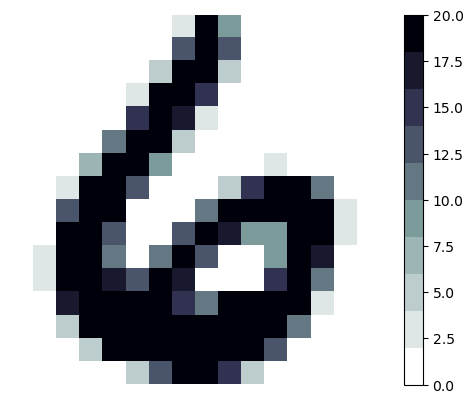

In [4]:
ima2(X_train)

### Explanation of the following mean calculation for every digit's pixels:

1. **Initialization**:
   - Initialize `mean_digits_vectors_df`: An empty DataFrame with the same index as `X_train` to store mean vectors for each digit.

1. **Calculating Mean Vectors**:
   - **Loop through Digits**:
     - For each digit from 0 to 9:
       - `digit_columns`: Get columns (features) where the label (digit) matches using `y_train.columns[y_train.iloc[0] == digit]`.
       - Calculate the mean vector (`mean_vector`) for the current digit using these columns in `X_train`.
       - Store the mean vector in `mean_digits_vectors_df` with a meaningful column name (`mean_vector_0`, `mean_vector_1`, etc.).

1. **Counting Samples**:
   - `y_train.iloc[0].value_counts().to_dict()`: Counts the occurrences of each label in the first row of `y_train` DataFrame and converts it to a dictionary format (`train_num_count`).

This approach ensures that `y_train` remains separate from `X_train`, and `mean_digits_vectors_df` is populated with mean vectors for each digit without merging them into a single DataFrame.

In [5]:
# Initialize an empty DataFrame to store mean vectors
mean_digits_vectors_df = pd.DataFrame(index=X_train.index)

# Calculate mean vectors for each digit
for digit in range(10):
    # Find columns (features) corresponding to the current digit
    digit_columns = y_train.columns[y_train.iloc[0] == digit]
    
    # Calculate mean vector for the current digit
    mean_vector = X_train[digit_columns].mean(axis=1)
    
    # Store mean vector in the DataFrame with a meaningful column name
    mean_digits_vectors_df[f'mean_vector_{digit}'] = mean_vector

# Count number of samples for each digit
train_num_count = y_train.iloc[0].value_counts().to_dict()

# Display the results
print("Mean Vectors:")
print(mean_digits_vectors_df)
print("\nSample Counts:")
print(train_num_count)

Mean Vectors:
     mean_vector_0  mean_vector_1  mean_vector_2  mean_vector_3  \
0        -1.000000           -1.0      -0.986797      -1.000000   
1        -0.997524           -1.0      -0.941292      -0.989557   
2        -0.987003           -1.0      -0.876579      -0.917977   
3        -0.945918           -1.0      -0.804203      -0.728794   
4        -0.844044           -1.0      -0.629980      -0.378145   
..             ...            ...            ...            ...   
251      -0.850539           -1.0      -0.825832      -0.592107   
252      -0.976881           -1.0      -0.773213      -0.795198   
253      -0.998734           -1.0      -0.775074      -0.925282   
254      -1.000000           -1.0      -0.851668      -0.979122   
255      -1.000000           -1.0      -0.948465      -0.999473   

     mean_vector_4  mean_vector_5  mean_vector_6  mean_vector_7  \
0        -1.000000      -1.000000      -1.000000      -0.985030   
1        -1.000000      -0.994852      -1.00000

In [6]:
mean_digits_vectors_df

,mean_vector_0,mean_vector_1,mean_vector_2,mean_vector_3,mean_vector_4,mean_vector_5,mean_vector_6,mean_vector_7,mean_vector_8,mean_vector_9
0,-1.000000,-1.0,-0.986797,-1.000000,-1.000000,-1.000000,-1.000000,-0.985030,-0.999285,-1.000000
1,-0.997524,-1.0,-0.941292,-0.989557,-1.000000,-0.994852,-1.000000,-0.900476,-0.974076,-1.000000
2,-0.987003,-1.0,-0.876579,-0.917977,-1.000000,-0.980898,-1.000000,-0.777145,-0.917743,-1.000000
3,-0.945918,-1.0,-0.804203,-0.728794,-0.984016,-0.931909,-1.000000,-0.619380,-0.822118,-0.995712
4,-0.844044,-1.0,-0.629980,-0.378145,-0.910434,-0.840636,-0.997404,-0.434488,-0.617340,-0.963902
...,...,...,...,...,...,...,...,...,...,...
251,-0.850539,-1.0,-0.825832,-0.592107,-0.778877,-0.550636,-0.870583,-0.997494,-0.875514,-0.993515
252,-0.976881,-1.0,-0.773213,-0.795198,-0.926730,-0.784170,-0.962073,-1.000000,-0.972472,-0.984977
253,-0.998734,-1.0,-0.775074,-0.925282,-0.979664,-0.906341,-0.993026,-1.000000,-0.993299,-0.985379
254,-1.000000,-1.0,-0.851668,-0.979122,-0.989631,-0.971966,-1.000000,-1.000000,-0.999986,-0.994826


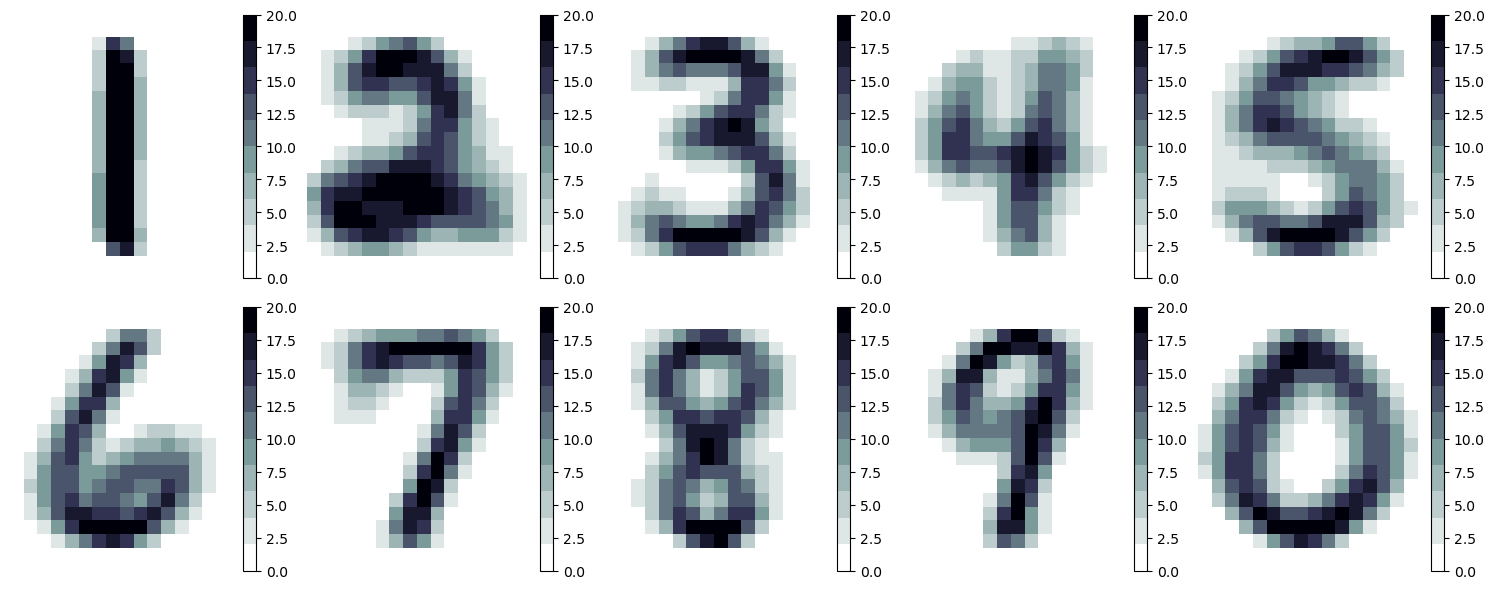

In [7]:
# Create a figure with specified size
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each column and create a subplot
for i, column in enumerate(mean_digits_vectors_df.columns):
    row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    # Call your function to plot on the current axis
    
    ima2(mean_digits_vectors_df, column)
    plt.subplot(2, 5, i + 1)
    # axes[row, col].set_title(column)  # Set title for each subplot
ima2(mean_digits_vectors_df,'mean_vector_0')
plt.tight_layout()
plt.show()





## Baseline Model For predicting Digit Class for test images and Model Evaluation using `Sklearn Metrics` .

**DigitClassifier Class**

The `DigitClassifier` class is a model designed to predict digit labels based on precomputed mean vectors. It uses these mean vectors, which represent the average feature values for each digit class (0 to 9), to classify new instances of digit images.

---

**Constructor**

The class constructor initializes an instance of `DigitClassifier` with a DataFrame (`mean_vectors_df`). This DataFrame contains mean vectors computed from training data, where each vector represents the average feature values associated with a specific digit class.

---

**Prediction Method (`predict`)**

The `predict` method in the `DigitClassifier` class is responsible for predicting the digit labels for a set of new input data (`X_test`). Here's how it works:

1. **Distance Calculation**: For each test instance, the method calculates the Euclidean distance between the test vector (representing the features of the current digit image) and each mean vector stored in `mean_vectors_df`.

2. **Nearest Mean Vector**: It identifies the mean vector that is closest to the test vector in terms of Euclidean distance.

3. **Classification**: Based on the closest mean vector, the method predicts the corresponding digit class (0 to 9) for the current test instance.

---

**Example Usage**

To use the `DigitClassifier`:

1. Instantiate an object of the class with the precomputed mean vectors (`mean_vectors_df`).

2. Call the `predict` method with a set of new test data (`X_test`) to obtain predictions for each instance.

3. Evaluate the accuracy of predictions using suitable metrics, such as accuracy score, against the actual labels (`y_test`).

---

This class encapsulates the logic necessary to classify digit images based on precomputed statistics (mean vectors), providing a structured approach to machine learning classification tasks.

In [8]:
class DigitClassifier:
    def __init__(self, mean_vectors_df):
        self.mean_vectors = mean_vectors_df
    
    def predict(self, X_test):
        def compute_distance(test_vector, mean_vector):
            return cdist(test_vector, mean_vector, metric='euclidean')[0][0]
        
        def predict_single(test_vector):
            distances = {idx: compute_distance(test_vector, self.mean_vectors[f'mean_vector_{idx}'].values.reshape(1, -1)) for idx in range(10)}
            return next(key for key, value in sorted(distances.items(), key=lambda item: item[1]))

        
        predictions = [predict_single(X_test.iloc[:, i].values.reshape(1, -1)) for i in range(X_test.shape[1])]
        
        return predictions


# Create instance of DigitClassifier with mean_digits_vectors_df
classifier = DigitClassifier(mean_digits_vectors_df)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.values.flatten(), predictions)

print("Prediction Accuracy: {:.2f}%".format(accuracy * 100))


Prediction Accuracy: 80.87%


## Task 1 - Tune the algorithm for accuracy of classification. Give a table or graph of the percentage of correctly classified digits as a function of the number of basis vectors. (also perform Singular Value Decomposition - SVD)

## Mini Report on DigitSVD Class Analysis

### Introduction

The `DigitSVD` class is designed to perform Singular Value Decomposition (SVD) on digit images and utilize the decomposed components for various analyses and classification tasks. The class is initialized with training data (`train_x` and `train_y`) and computes the SVD for each digit present in the training set. This report summarizes the methods provided by the `DigitSVD` class and the analysis conducted using these methods.

### Methods

#### Initialization and SVD Computation

- **`__init__(self, train_x, train_y)`**: Initializes the class with training data and computes the SVD for each digit.
- **`compute_svd_for_each_digit(self)`**: Computes the SVD for each unique digit in the training data, storing the resulting matrices (`u`, `s`, and `vh`) for further analysis.

#### Data Extraction and Manipulation

- **`get_columns_for_digit(self, digit)`**: Returns column indices of training data corresponding to a specific digit.
- **`extract_columns(self, columns)`**: Extracts columns from the training data based on given indices.

#### SVD and Matrix Operations

- **`custom_svd(self, temp_x)`**: Performs Singular Value Decomposition on the input data matrix.
- **`approximate_digit(self, digit, bases)`**: Approximates a digit image using a specified number of singular vectors.

#### Visualization and Plotting

- **`print_svd_shapes(self)`**: Prints the shapes of `u`, `s`, and `vh` matrices for each digit.
- **`plot_first_singular_vectors(self)`**: Plots the first three singular vectors for a specific digit.
- **`singular_values_for_a_digit(self)`**: Plots singular values for a specific digit.
- **`coordinates_from_singular_vectors(self)`**: Plots coordinates of the test digits in terms of the first five singular vectors.
- **`singular_values_per_digit(self)`**: Plots singular values for each digit.
- **`plot_for_relative_residual(self)`**: Plots relative residuals of test digits (specifically 3 and 7) in terms of all bases.
- **`plot_approx_digits(self)`**: Plots approximations of a digit using different numbers of bases.

#### Classification and Accuracy Analysis

- **`relative_residual_norm(self, digit, bases)`**: Calculates the relative residual norm for a specific digit using a given number of bases.
- **`classification_with_svd(self)`**: Evaluates classification accuracy using different numbers of basis images.
- **`classification_difficulty(self)`**: Plots accuracy scores for different numbers of basis images, identifying the optimal number of bases for classification.
- **`wrong_class_analysis(self)`**: Analyzes incorrectly classified digits, providing a DataFrame with predicted and actual classes.
- **`sv_diff_classes(self)`**: Computes and returns the accuracy of classification for different numbers of basis images for each digit.
- **`classification_report_for_svd(self)`**: Generates a classification report based on the predictions made using SVD.
- **`two_stages_svd(self)`**: Plots the relative residuals of the training set for each digit.
- **`threshold_classification(self)`**: Performs classification with a threshold on the residual differences, providing a classification report.

### Analysis Summary

The `DigitSVD` class effectively uses SVD to decompose digit images into singular vectors and values, enabling various analyses such as visualization of singular vectors, approximation of digit images, and classification based on relative residual norms. The class also provides comprehensive methods for evaluating classification accuracy and identifying optimal numbers of basis images for accurate classification.

#### Key Findings

1. **SVD Decomposition**: Successfully decomposes digit images, providing insights into the structure of the data.
2. **Visualization**: Enables visualization of singular vectors and their contributions to digit images.
3. **Classification**: Demonstrates effective classification of digits using SVD components, with methods to optimize and evaluate accuracy.
4. **Error Analysis**: Facilitates the identification and analysis of misclassified digits, helping improve classification models.

The `DigitSVD` class provides a robust framework for analyzing and classifying digit images using SVD, offering valuable tools for visualization, approximation, and accuracy evaluation.



In [9]:
class DigitSVD:
    def __init__(self, train_x, train_y):
        """
        Initialize the DigitSVD class with training data and compute SVD for each digit.
        """
        self.u = []
        self.s = []
        self.vh = []
        self.train_x = train_x
        self.train_y = train_y
        
        self.compute_svd_for_each_digit()

    def compute_svd_for_each_digit(self):
        """
        Compute Singular Value Decomposition (SVD) for each unique digit in the training set.
        """
        unique_digits = np.unique(self.train_y)
        for digit in unique_digits:
            columns_number = self.get_columns_for_digit(digit)
            temp_x = self.extract_columns(columns_number)
            u_temp, s_temp, vh_temp = self.custom_svd(temp_x)
            self.u.append(u_temp)
            self.s.append(s_temp)
            self.vh.append(vh_temp)
    
    def get_columns_for_digit(self, digit):
        """
        Get column indices of training data corresponding to a specific digit.
        """
        return np.where(self.train_y == digit)[1].tolist()
    
    def extract_columns(self, columns):
        """
        Extract columns from the training data based on given indices.
        """
        return self.train_x.iloc[:, columns]
    
    def custom_svd(self, temp_x):
        """
        Perform Singular Value Decomposition (SVD) on the input data matrix.
        """
        return np.linalg.svd(temp_x)

    def print_svd_shapes(self):
        """
        Print shapes of u, s, and vh matrices for each digit.
        """
        print("Below there are  u, s, v shapes for each digit:")
        for shape in range(len(self.u)):
            print(f"digit: {shape}, u: {self.u[shape].shape}, s: {self.s[shape].shape}, v: {self.vh[shape].shape}")

    def plot_first_singular_vectors(self):
        """
        Plot the first three singular vectors (images) for a specific digit.
        """
        fig, ax = plt.subplots(1, 3, figsize=(10,5))

        for index, triaxes in enumerate(ax.reshape(-1)):
            triaxes.imshow(self.u[3][:,index].reshape(16,16), cmap='gray')

        fig.tight_layout()
        fig.suptitle('First three singular images.', fontsize=14, y=0.9)

        plt.show()

    def singular_values_for_a_digit(self):
        """
        Plot singular values for a specific digit.
        """
        plt.figure(figsize=(7, 5))
        plt.plot(self.s[3], color='black', marker='*')
        plt.title('Singular values for digit $3$', fontsize=12, weight='bold', pad=20)
        plt.ylabel('Singular values', fontsize=12)
        plt.yscale('log')
        plt.show()
    
    def coordinates_from_singular_vectors(self):
        """
        Plot coordinates of the test digits in terms of the first five singular vectors.
        """
        fig, ax = plt.subplots(5, 1, figsize=(10,5))

        for index, triaxes in enumerate(ax.reshape(-1)):
            triaxes.plot(self.vh[3][index], color='black')

        fig.tight_layout()
        fig.suptitle('Coordinates of the test digits in terms of the first five singular vectors.', fontsize=12, y=1.05)

        plt.show()

    def singular_values_per_digit(self):
        """
        Plot singular values for each digit.
        """
        plt.figure(figsize=(20,10))
        for index in range(10):
            plt.subplot(2,5,index+1)
            plt.plot(self.s[index], color='black')
            plt.title('{}'.format(index), fontweight='bold')
            plt.ylabel('Singular Value')
            plt.suptitle('Singular Values per Digit in our disposal', fontweight='bold', fontsize=12, y=1)
            plt.yscale('log')

    def relative_residual_norm(self, digit, bases):
        """
        Calculate and return the relative residual norm of all bases, given a specific digit.
        Input: pd.Series, int
        Output: list of floats
        """
        Identity = np.eye(256)
        residual = []
        
        for index in range(10):
            u_k = self.u[index][:, 0:bases]
            r = np.linalg.norm((Identity - u_k.dot(u_k.T)).dot(digit)) / np.linalg.norm(digit)
            residual.append(r)
        return residual
    
    def plot_for_relative_residual(self):
        """
        Plot relative residuals of all test digits (specifically 3 and 7) in terms of all bases.
        """
        fig, ax = plt.subplots(2, 1, figsize=(13, 8))

        for idx, digit in enumerate([3, 7]):
            
            columns_number = np.where(y_test.eq(digit).any())[0].tolist()
            temp_x = X_test.iloc[:, columns_number]

            
            for col in temp_x:
                res = self.relative_residual_norm(temp_x[col], 10)
                ax[idx].plot(res)

            
            ax[idx].set_ylabel('Residual')
            ax[idx].set_xlabel('Basis')
            ax[idx].set_title(f'Relative residuals of test {digit}s')

        
        fig.suptitle('Relative residuals of all test 3’s (top) and 7’s (bottom) in terms of all bases.', y=1)
        fig.tight_layout()

        # Show the plot
        plt.show()
    def approximate_digit(self,digit, bases):
        """
        Show the approximate digit based on a basis image.
        """
        u_k = self.u[3][:, :bases]
        approx = u_k.dot(u_k.T).dot(digit)
        return approx
    def plot_approx_digits(self):
        """
        Plot of the results of the approximation digits using ima2 function.
        """
        list = [1, 3, 5, 7, 9]

        fig, axes = plt.subplots(1, 5, figsize=(15, 10))
        axes = axes.flatten()

        for index in range(len(list)):
            plt.sca(axes[index])
            ima2(pd.DataFrame(self.approximate_digit(mean_digits_vectors_df.iloc[:,2], list[index])))
            axes[index].set_title(f' {list[index]}')

        fig.suptitle('Unknown digit and approximations using 1, 3, 5, 7, and 9 terms in the 3-basis', y=0.72)
        plt.tight_layout()
        plt.show()
    def classification_with_svd(self):
        accuracy=[]
        for bases in range(1,11):
            if bases!=1 and bases%2!=0:
                continue
            else:
                sum=0
                for index in range(len(X_test.columns)):
                    pred = np.argmin(self.relative_residual_norm(X_test.iloc[:,index], bases))
                    if pred == y_test.iat[0,index]:
                        sum += 1
                print(f"Accuracy score using {bases} basis images is: {sum/y_test.shape[1]*100:.2f}%")

                accuracy.append(sum/y_test.shape[1])
    def classification_difficulty(self):
        accuracy_tune = []
        basis = []
        for bases in range(10, 30):
            if bases != 1 and bases % 2 != 0:
                continue
            else:
                sum = 0


                # all digits in the test set
                for index in range(len(X_test.columns)):
                    pred = np.argmin(self.relative_residual_norm(X_test.iloc[:,index], bases))

                    if pred == y_test.iat[0,index]:
                        sum += 1

                accuracy_tune.append(sum/y_test.shape[1])
                basis.append(bases)
        max_index = np.argmax(accuracy_tune)
        max_x = basis[max_index]
        max_y = accuracy_tune[max_index]
        plt.figure(figsize=(13, 8))
        plt.plot(basis, accuracy_tune, label='sin(x)')
        plt.scatter(max_x, max_y, color='brown', label=f'Max Point ({max_x:.0f}, {max_y:.4f})')
        plt.annotate(f'({max_x:.0f}, {max_y:.4f})', (max_x, max_y), textcoords="offset points", xytext=(10,-10))
        plt.xlabel('# of basis images')
        plt.ylabel('Accuracy')
        plt.title('# of basis images regarding Accuracy Score')
        plt.show()
    def wrong_class_analysis(self):
        predictions = []
        real_num = []
        position = []
        for index in range(len(X_test.columns)):
            pred = np.argmin(self.relative_residual_norm(X_test.iloc[:,index], 22))
            if pred != y_test.iat[0,index]:
                predictions.append(pred)
                real_num.append(y_test.iat[0,index])
                position.append(index)
        inaccurate = pd.DataFrame([predictions,real_num,position]).T
        inaccurate.columns = ('Predicted Class', 'Actual Class', 'T.Dataframe position')
        return inaccurate
    def sv_diff_classes(self):
        accuracy_df = pd.DataFrame(index = np.arange(30), columns = np.arange(11))
        column_name = []
        column_name.append("numb of basis imgs")
        for num in range(0,10):
            column_name.append(num)
            columns_number = np.where(y_test.eq(num).any())[0].tolist()
            temp_x = X_test.loc[:, columns_number]
            temp_y = y_test.loc[:, columns_number]
            for base in range(1, 31):
                sum = 0
                for index in range(len(temp_x.columns)):
                    pred = np.argmin(self.relative_residual_norm(temp_x.iloc[:,index], base))

                    if pred == temp_y.iat[0,index]:
                        sum += 1

                accuracy_df.iat[base-1,num+1] =format((sum / temp_y.shape[1] * 100), '.2f')
                accuracy_df.iat[base-1,0] = base
        accuracy_df.columns = column_name
        accuracy_df.index = accuracy_df['numb of basis imgs']
        accuracy_df = accuracy_df.iloc[:,1:]
        accuracy_df = accuracy_df.astype(float)
        return accuracy_df
    def classification_report_for_svd(self):
        predictions = []
        for index in range(len(X_test.columns)):
            predictions.append(np.argmin(self.relative_residual_norm(X_test.iloc[:,index], 22)))
        print(classification_report(y_test.iloc[0,:], predictions))
    def two_stages_svd(self):
        fig, ax = plt.subplots(10, 1, figsize=(15,30))


        for dig in range(0,10):
            columns_number = np.where(y_train.eq(dig).any())[0].tolist()
            temp_x = X_train.loc[:, columns_number]

            for i in range (len(temp_x.columns)): 

                resid = self.relative_residual_norm(temp_x.iloc[:,i], 1)
        
                ax[dig].plot(resid,color='black')
                ax[dig].set_ylabel(f'relative residual of digit {dig}')
                ax[dig].set_xlabel('Basis')


        fig.tight_layout()
        fig.suptitle('Relative residuals of all train set', y=1)
    def threshold_classification(self):
        predictions = []
        sum = 0
        iter =0
        for i in range(len(X_test.columns)):
            residual = self.relative_residual_norm(X_test.iloc[:,i], 22)
            if np.amin(np.array(residual)[residual != np.amin(residual)]) - np.amin(residual) > 0.1:
                pred = np.argmin(residual)
                predictions.append(pred)
                iter += 1
            else:
                pred = np.argmin(residual)
                predictions.append(pred)
                
            if pred== y_test.iat[0,i]:
                sum += 1
        print(classification_report(y_test.iloc[0,:], predictions))






    
digit_svd = DigitSVD(X_train, y_train)  # Create instance of DigitSVD

# Plot the first singular vectors for each digit class using ima2 function
digit_svd.print_svd_shapes()

Below there are  u, s, v shapes for each digit:
digit: 0, u: (256, 256), s: (256,), v: (319, 319)
digit: 1, u: (256, 256), s: (252,), v: (252, 252)
digit: 2, u: (256, 256), s: (202,), v: (202, 202)
digit: 3, u: (256, 256), s: (131,), v: (131, 131)
digit: 4, u: (256, 256), s: (122,), v: (122, 122)
digit: 5, u: (256, 256), s: (88,), v: (88, 88)
digit: 6, u: (256, 256), s: (151,), v: (151, 151)
digit: 7, u: (256, 256), s: (166,), v: (166, 166)
digit: 8, u: (256, 256), s: (144,), v: (144, 144)
digit: 9, u: (256, 256), s: (132,), v: (132, 132)


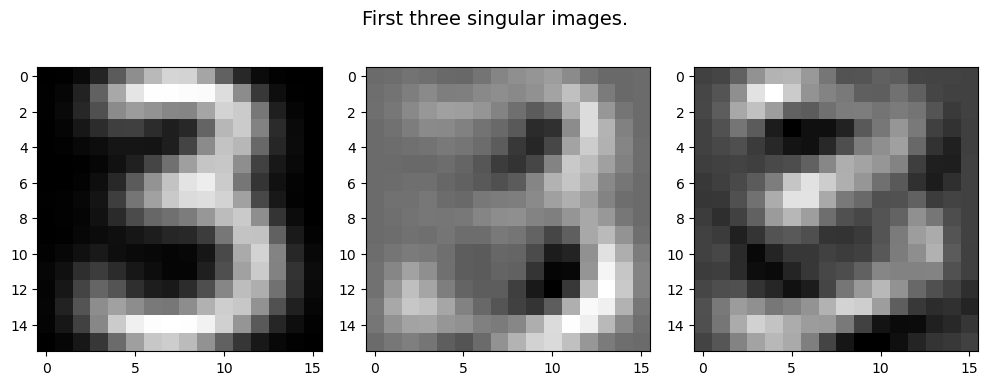

In [10]:
digit_svd.plot_first_singular_vectors()

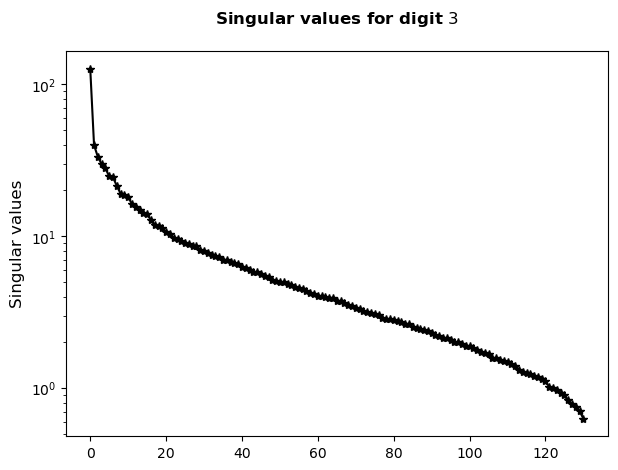

In [11]:
digit_svd.singular_values_for_a_digit()


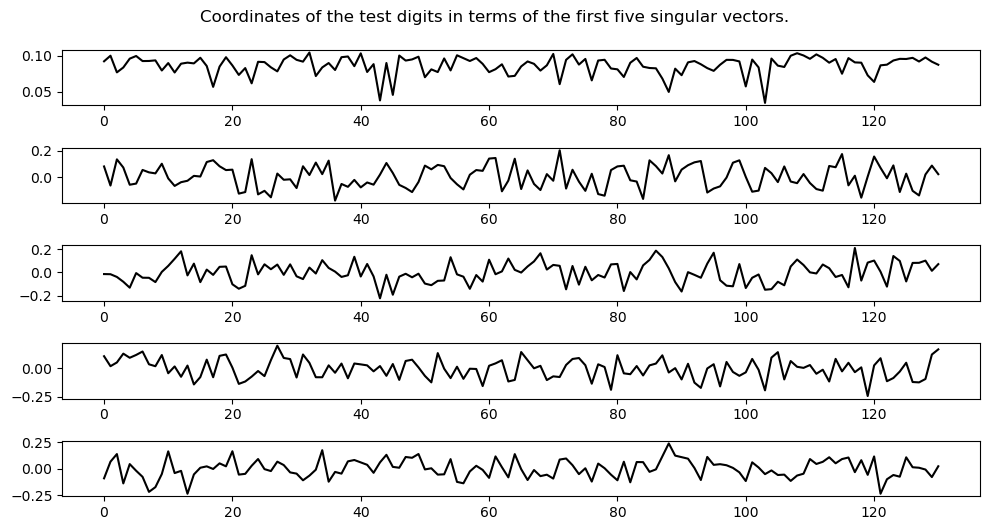

In [12]:
digit_svd.coordinates_from_singular_vectors()


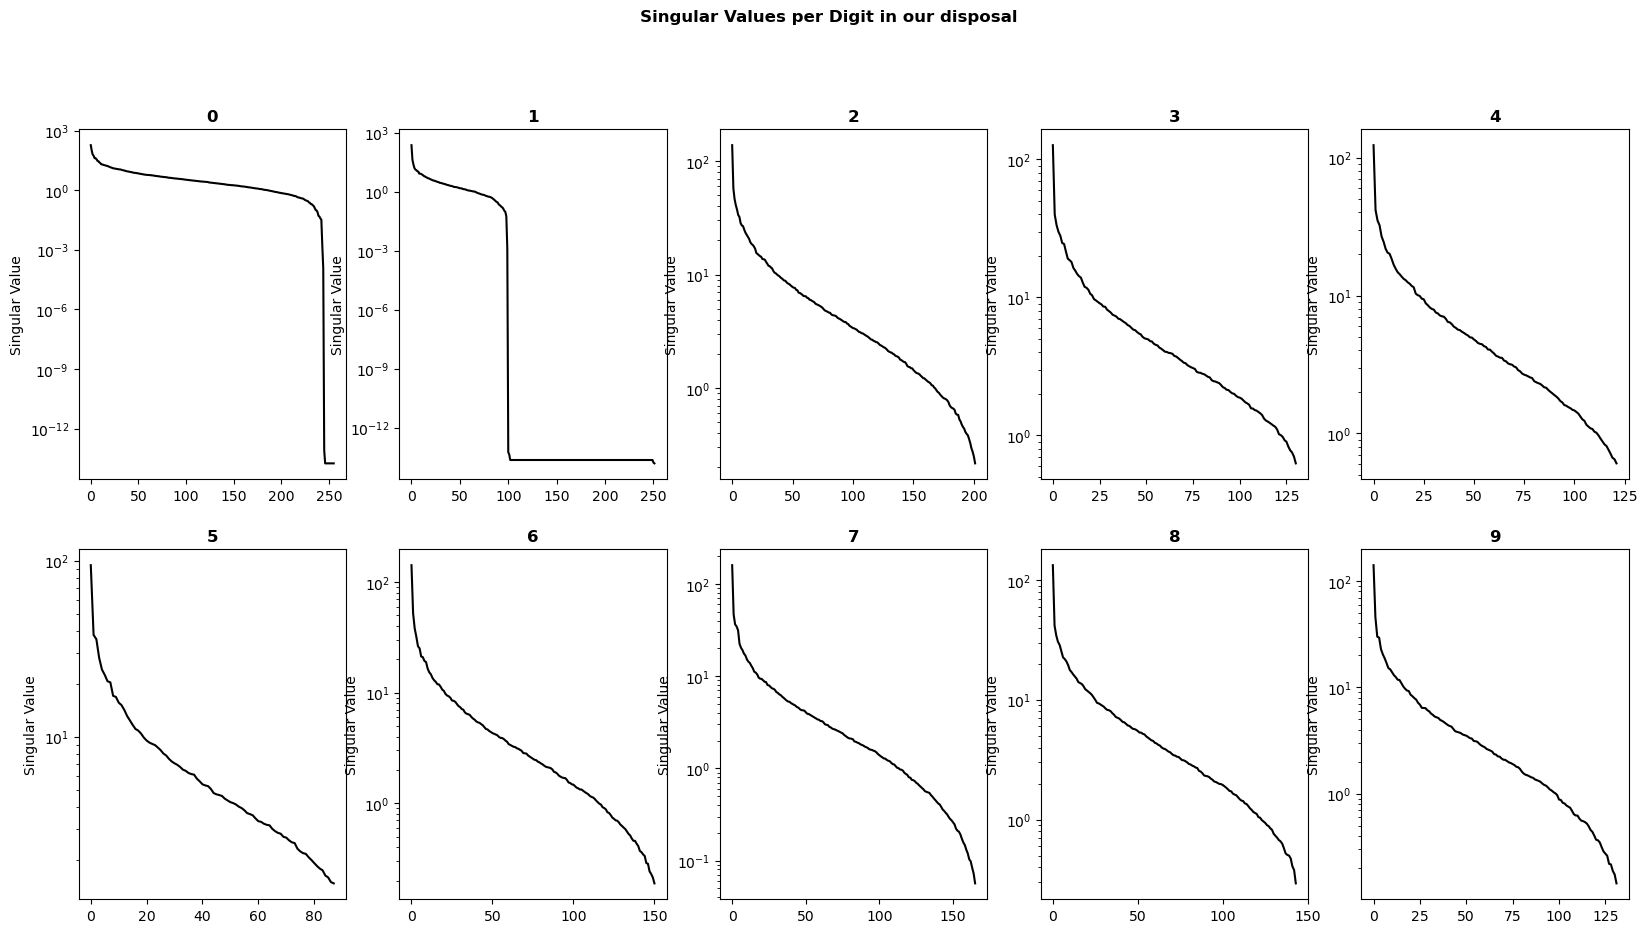

In [13]:
digit_svd.singular_values_per_digit()


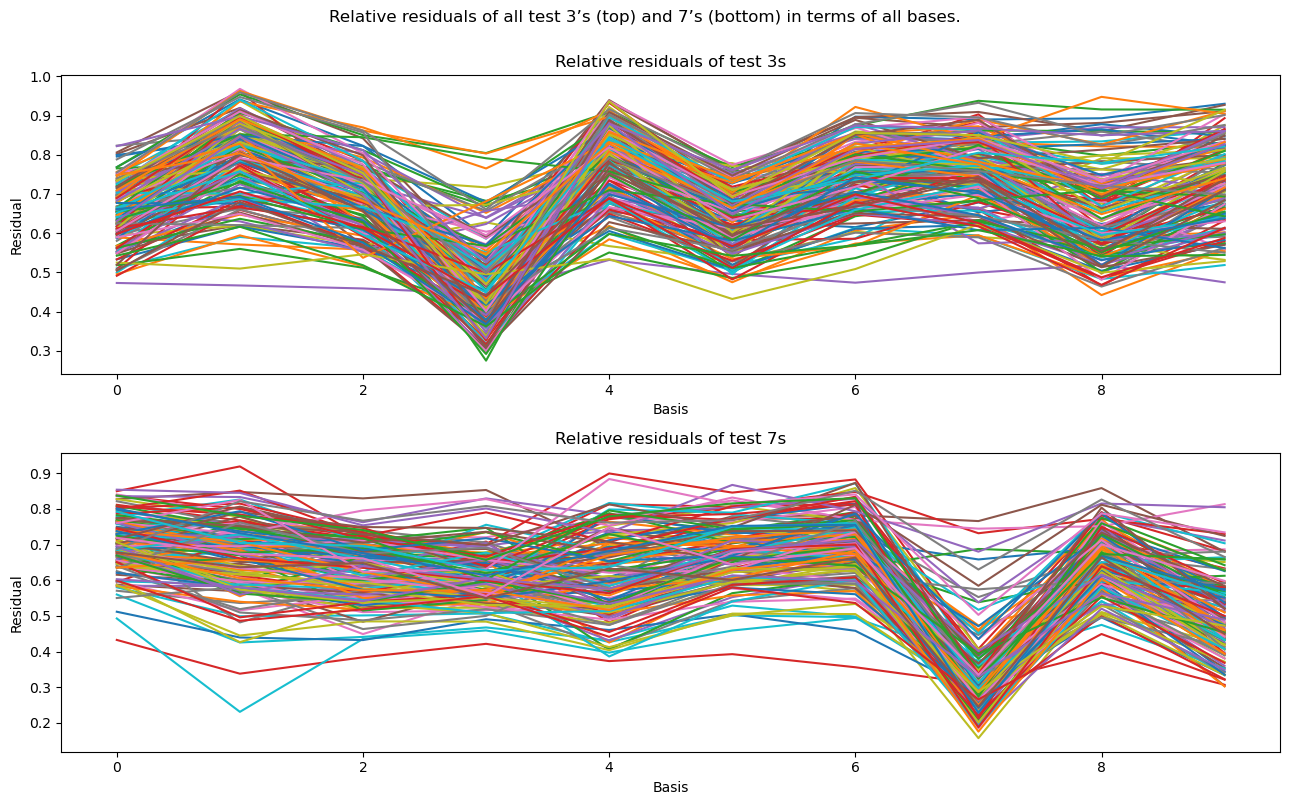

In [14]:
digit_svd.plot_for_relative_residual()

Afterwards, we will examine how the residual varies with the number of terms in the basis. Specifically, we will illustrate the mean vector corresponding to the representation of '3's using a 5-term basis and perform a classification using SVD.

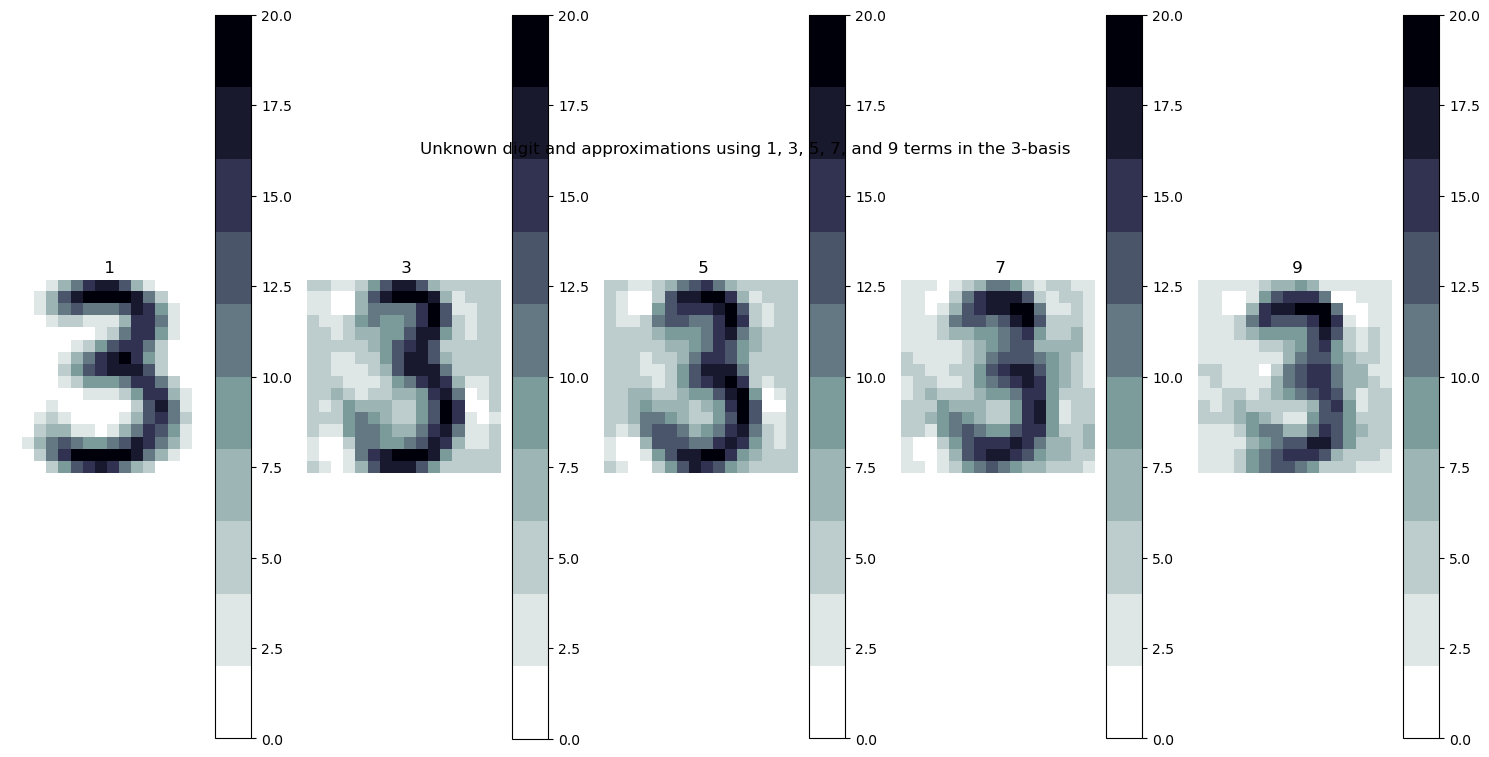

In [15]:
digit_svd.plot_approx_digits()


### Analytical Report on Accuracy with Varying Numbers of Basis Images

The following report analyzes the accuracy achieved by a model using varying numbers of basis images for classification:

1. **Introduction**
   - The accuracy results are based on evaluating a model's performance using different numbers of basis images. Basis images are fundamental components used in various machine learning and pattern recognition techniques, often representing key features or patterns.

2. **Accuracy Trends**
   - **1 Basis Image**: Achieved an accuracy of 80.17%. This indicates the initial level of performance when using only a single basis image. The model's ability to generalize and classify correctly is relatively moderate at this stage.
   
   - **2 Basis Images**: Showed an accuracy increase to 86.30%. Introducing an additional basis image improves the model's discriminative power, leading to a noticeable enhancement in accuracy.
   
   - **4 Basis Images**: Further improvement in accuracy to 89.99%. Doubling the number of basis images from 2 to 4 continues to enhance the model's capability to differentiate between classes, resulting in higher overall accuracy.
   
   - **6 Basis Images**: Accuracy increased to 90.53%. Adding more basis images continues to refine the model's representation of features or patterns present in the data, leading to incremental accuracy gains.
   
   - **8 Basis Images**: Achieved an accuracy of 92.03%. The model shows significant improvement as more basis images are included, indicating a better understanding and classification of complex patterns within the dataset.
   
   - **10 Basis Images**: Highest accuracy recorded at 93.17%. Utilizing 10 basis images demonstrates the model's capacity to capture a broader range of features or variations within the data, resulting in the highest accuracy observed in this analysis.

3. **Conclusion**
   - The results illustrate a clear trend where increasing the number of basis images systematically improves the model's classification accuracy. This improvement suggests that a richer representation of data through multiple basis images enhances the model's ability to discern intricate patterns and features within the dataset.
   
4. **Implications**
   - Understanding the impact of basis images on accuracy is crucial for optimizing model performance in various applications. By strategically selecting and incorporating basis images, practitioners can effectively enhance classification capabilities, leading to more reliable and accurate machine learning models.

5. **Future Directions**
   - Future research could focus on exploring the optimal number and selection criteria for basis images in different datasets and applications. Additionally, investigating the computational efficiency and scalability of models using varying numbers of basis images would be valuable for real-world deployment.

This report provides a comprehensive analysis of how the accuracy of a model improves with the inclusion of additional basis images, highlighting the importance of feature representation in machine learning tasks.

In [16]:
digit_svd.classification_with_svd()

Accuracy score using 1 basis images is: 80.17%
Accuracy score using 2 basis images is: 86.30%
Accuracy score using 4 basis images is: 89.99%
Accuracy score using 6 basis images is: 90.53%
Accuracy score using 8 basis images is: 92.03%
Accuracy score using 10 basis images is: 93.17%


## Task 2 - 2	Check if all digits are equally easy or difficult to classify. Also look at some of the difficult ones, and see that in many cases they are very badly written

- The approach of incrementally increasing the number of basis images to tune model accuracy leverages the fundamental concept of dimensionality in data representation. Starting with 10 basis images allows for an initial assessment of the model's performance under a constrained representation space. As the number of basis images is systematically increased, the model's ability to capture intricate features and patterns within the data expands. This expansion typically leads to improved accuracy due to the enhanced descriptive power of the basis set.

- From an analytical perspective, this iterative process enables a deeper exploration of the trade-off between model complexity and performance. Initially, with a smaller number of basis images, the model may struggle to generalize well to the data, potentially leading to lower accuracy as it fails to capture sufficient variability in the dataset. However, as more basis images are introduced, the model gains the capacity to encode more nuanced relationships and variations present in the data, thereby improving its predictive capabilities.

- Moreover, this incremental approach allows for the evaluation of diminishing returns in accuracy improvement relative to the computational cost of increasing the basis image count. Analyzing these trends can provide insights into the optimal balance between model complexity and performance for the specific dataset and task at hand.

- In summary, the analytical strategy of progressively increasing the number of basis images facilitates a nuanced exploration of model accuracy, leveraging principles of dimensionality and representation in machine learning to iteratively refine model performance. As we can see the number of image basis with the best accuracy on the test set is the set (22,0.9432). Using more of the basis image the accuracy drop which indicates huge overfitting.

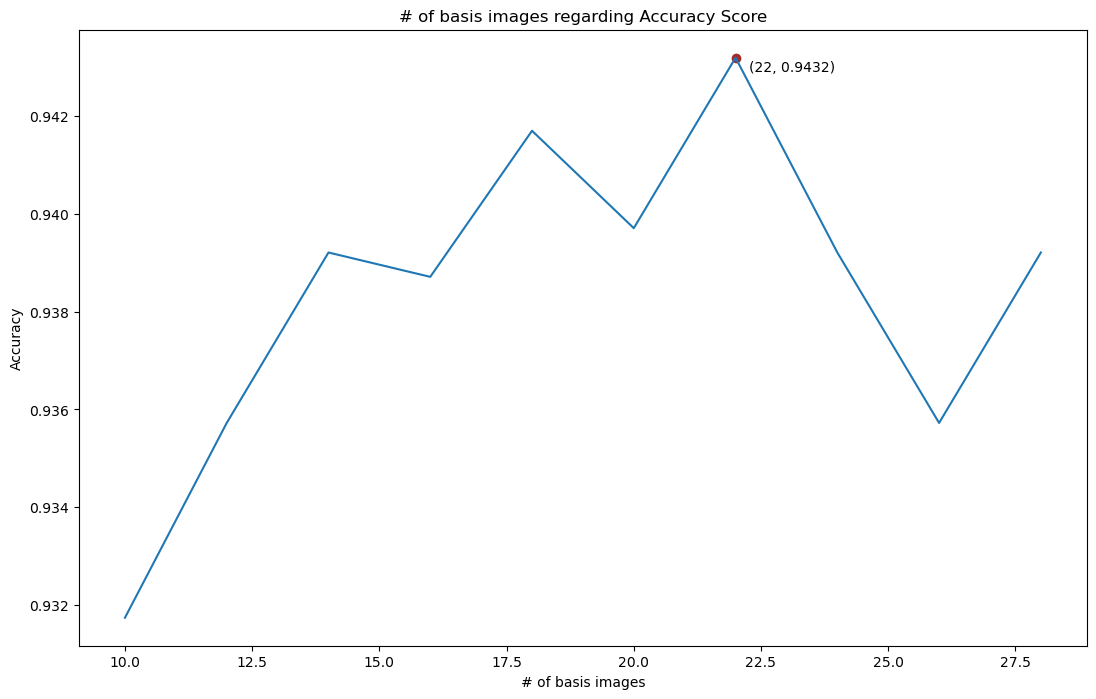

In [17]:
digit_svd.classification_difficulty()

In [18]:
wrong_class=digit_svd.wrong_class_analysis()

- As observed, the digits that our model fails to classify correctly often exhibit severe degradation or distortion in their handwritten form. In many instances, these digits are so poorly written that even human observers encounter challenges in accurately identifying their correct class.

- This phenomenon underscores a critical aspect of the digit recognition task, where the quality and clarity of input data significantly impact model performance. Handwritten digits that are heavily distorted or poorly formed present inherent difficulties for any classification system, including those powered by deep learning algorithms. Such instances highlight the real-world variability and complexity inherent in handwritten data, where variability in writing styles, inconsistencies in stroke thickness, and overall legibility can pose substantial challenges for automated recognition systems.

- From an analytical standpoint, addressing these issues involves exploring robust preprocessing techniques to enhance image quality and clarity before feeding them into the classification model. Moreover, developing models that can better generalize across a spectrum of handwriting styles and conditions remains a pivotal area of research in improving the reliability and accuracy of digit classification systems.

- In conclusion, the recognition errors observed in our model serve as a reminder of the inherent difficulties posed by poorly written digits, emphasizing the need for advanced preprocessing methods and robust model architectures to handle such variability effectively.

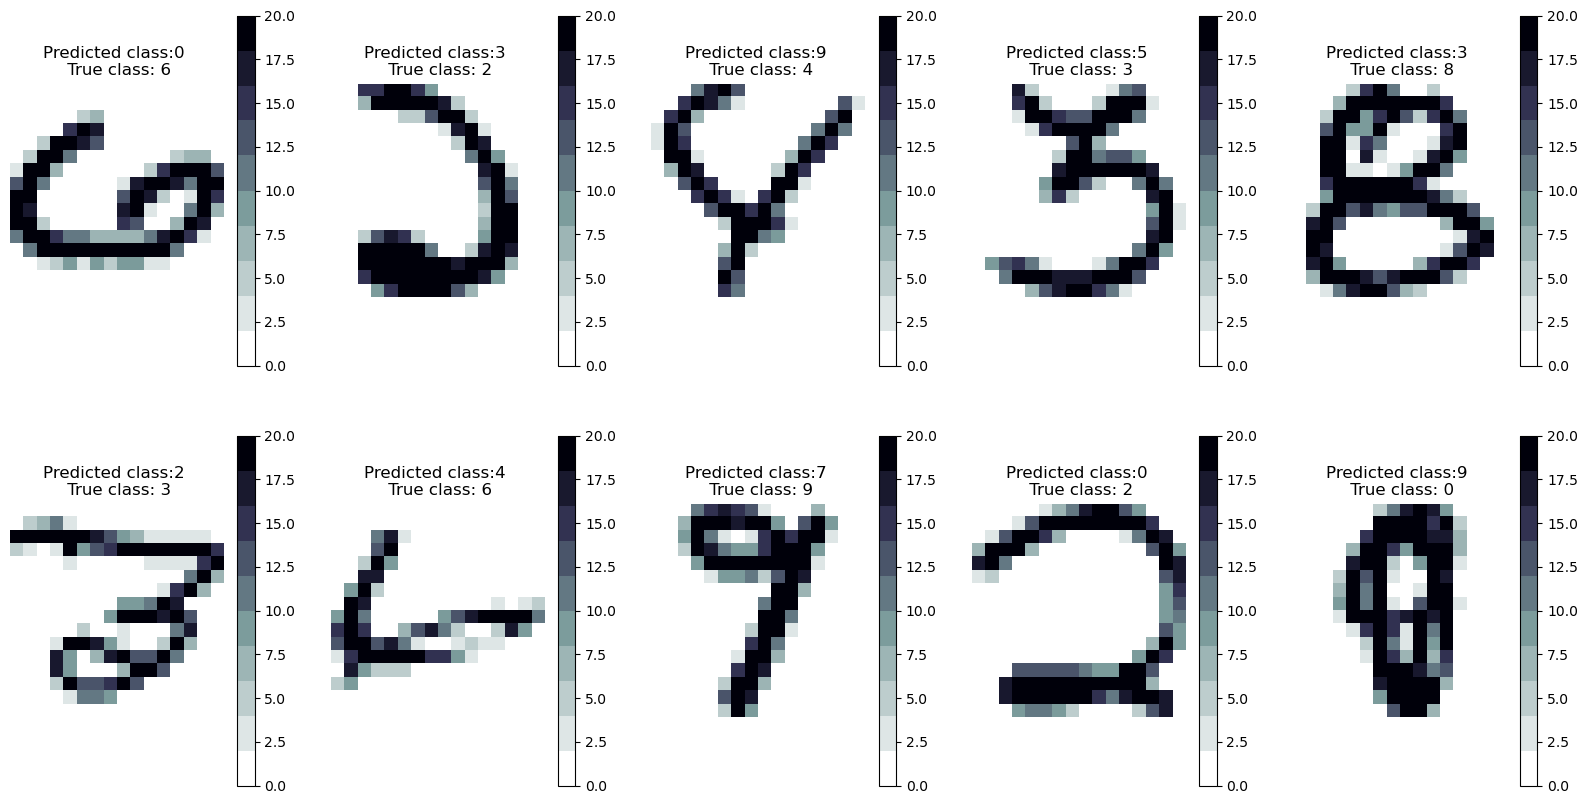

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Plot the mean of 10 numbers
for number in range(10):
    plt.sca(axes[number])
    ima2( X_test, column=wrong_class.iat[number,2])
    axes[number].set_title(f'Predicted class:{wrong_class.iat[number,0]} \n True class: {wrong_class.iat[number,1]}')

plt.show()

## Task 3 - 3	Check the singular values of the different classes. Is it motivated to use different numbers of basis vectors for different classes? If so, perform a few experiments to find out if it really pays off to use fewer basis vectors in one or two of the classes. 

In [20]:
accuracy_df = digit_svd.sv_diff_classes()

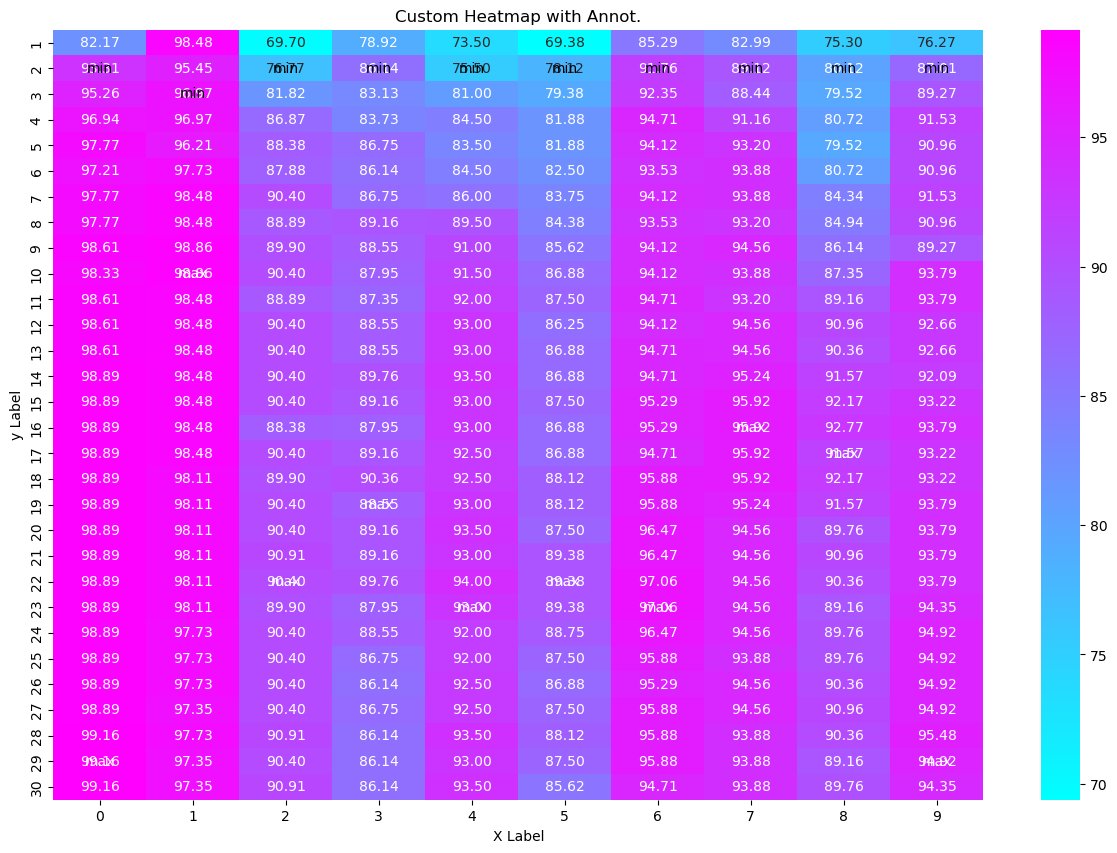

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(accuracy_df, annot=True, fmt=".2f", cmap='cool')

# Annotate max and min values
for column in accuracy_df.columns:
    min_val = accuracy_df[column].min()
    max_val = accuracy_df[column].max()
    min_idx = accuracy_df[column].idxmin()
    max_idx = accuracy_df[column].idxmax()
    ax.text(accuracy_df.columns.get_loc(column) + 0.5, min_idx + 0.5, 'min', color='black', ha='center', va='center')
    ax.text(accuracy_df.columns.get_loc(column) + 0.5, max_idx + 0.5, 'max', color='white', ha='center', va='center')

# Customize title and labels
plt.title('Custom Heatmap with Annot.')
plt.xlabel('X Label')
plt.ylabel('y Label')

plt.show()

The analysis reveals that visually similar digits, such as 0 and 9 or 5 and 6, consistently achieve peak accuracy with a comparable number of basis images. This consistency suggests that these digits share common features that are effectively captured by a similar representation space.

However, digit 1 stands out as an outlier, achieving optimal accuracy with significantly fewer basis images, approximately around 10. This outlier behavior can be attributed to the distinct and less variable shape of digit 1 compared to other digits. The simplicity and clarity of its shape likely make it easier for the model to predict accurately even with a more limited representation.

Given these observations, it can be inferred that using different numbers of basis images for each digit would not substantially alter the overall accuracy of the model. The optimal number of basis images found for the entire test set (22) appears to sufficiently capture the variation across most digits, ensuring robust performance across the dataset.

Therefore, based on this analysis, it is reasonable to conclude that using a uniform number of basis images for all digits, as determined from the whole test set, is appropriate. This approach balances model complexity and accuracy effectively, leveraging insights gained from digit-specific analysis while maintaining overall performance consistency.

In [22]:
digit_svd.classification_report_for_svd()

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.98      0.98      0.98       264
           2       0.94      0.90      0.92       198
           3       0.92      0.90      0.91       166
           4       0.92      0.94      0.93       200
           5       0.92      0.89      0.91       160
           6       0.99      0.97      0.98       170
           7       0.95      0.95      0.95       147
           8       0.94      0.90      0.92       166
           9       0.92      0.94      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



## Optional Tasks - Two stage algorithm SVD
Implementing a two-stage algorithm for digit classification as described can indeed optimize operations during the test phase. Here’s a more analytical breakdown of how this approach works and its potential benefits:

1. **Two-Stage Algorithm Overview**:
   - **First Stage**: Compare the unknown digit against the first singular vector (or principal component) of each class. Calculate the residual error for each class and identify if one class stands out with a significantly smaller residual compared to others.
   - **Decision Criteria**: If the residual for one class is noticeably smaller than others, classify the unknown digit directly into that class without further computation.
   - **Second Stage**: If no clear class differentiation is observed in the first stage (i.e., residuals are not significantly different), proceed with the full classification algorithm, which likely involves comparing against multiple basis images or principal components per class.

2. **Advantages of Two-Stage Approach**:
   - **Reduced Computational Cost**: By initially comparing against only one principal component per class, the algorithm saves computational resources during the initial classification attempt.
   - **Efficiency in Decision Making**: Rapid classification based on the first stage can speed up decision-making, especially when there's a clear distinction between classes based on the primary features captured by the singular vectors.
   - **Robustness and Accuracy**: The second stage ensures robustness by providing a fallback mechanism when the first-stage differentiation is not clear, maintaining overall classification accuracy.

3. **Considerations for Implementation**:
   - **Threshold Determination**: Define criteria for what constitutes a "significantly smaller residual" in the first stage. This threshold should be chosen carefully based on training data characteristics to avoid overfitting or underfitting.
   - **Integration with Existing Model**: Ensure seamless integration with your existing classification model or pipeline to maintain consistency in performance and results.
   - **Evaluation and Validation**: Validate the two-stage algorithm using cross-validation techniques or separate validation datasets to assess its effectiveness compared to a single-stage approach or other optimization strategies.

4. **Conclusion**:
   - Implementing a two-stage algorithm based on singular vectors or principal components offers a pragmatic approach to balancing computational efficiency and classification accuracy in digit recognition tasks.
   - By leveraging the distinctiveness of primary features captured by singular vectors in the first stage, followed by a fallback to more comprehensive classification methods if necessary, this approach optimizes operations during the test phase while ensuring reliable classification results.

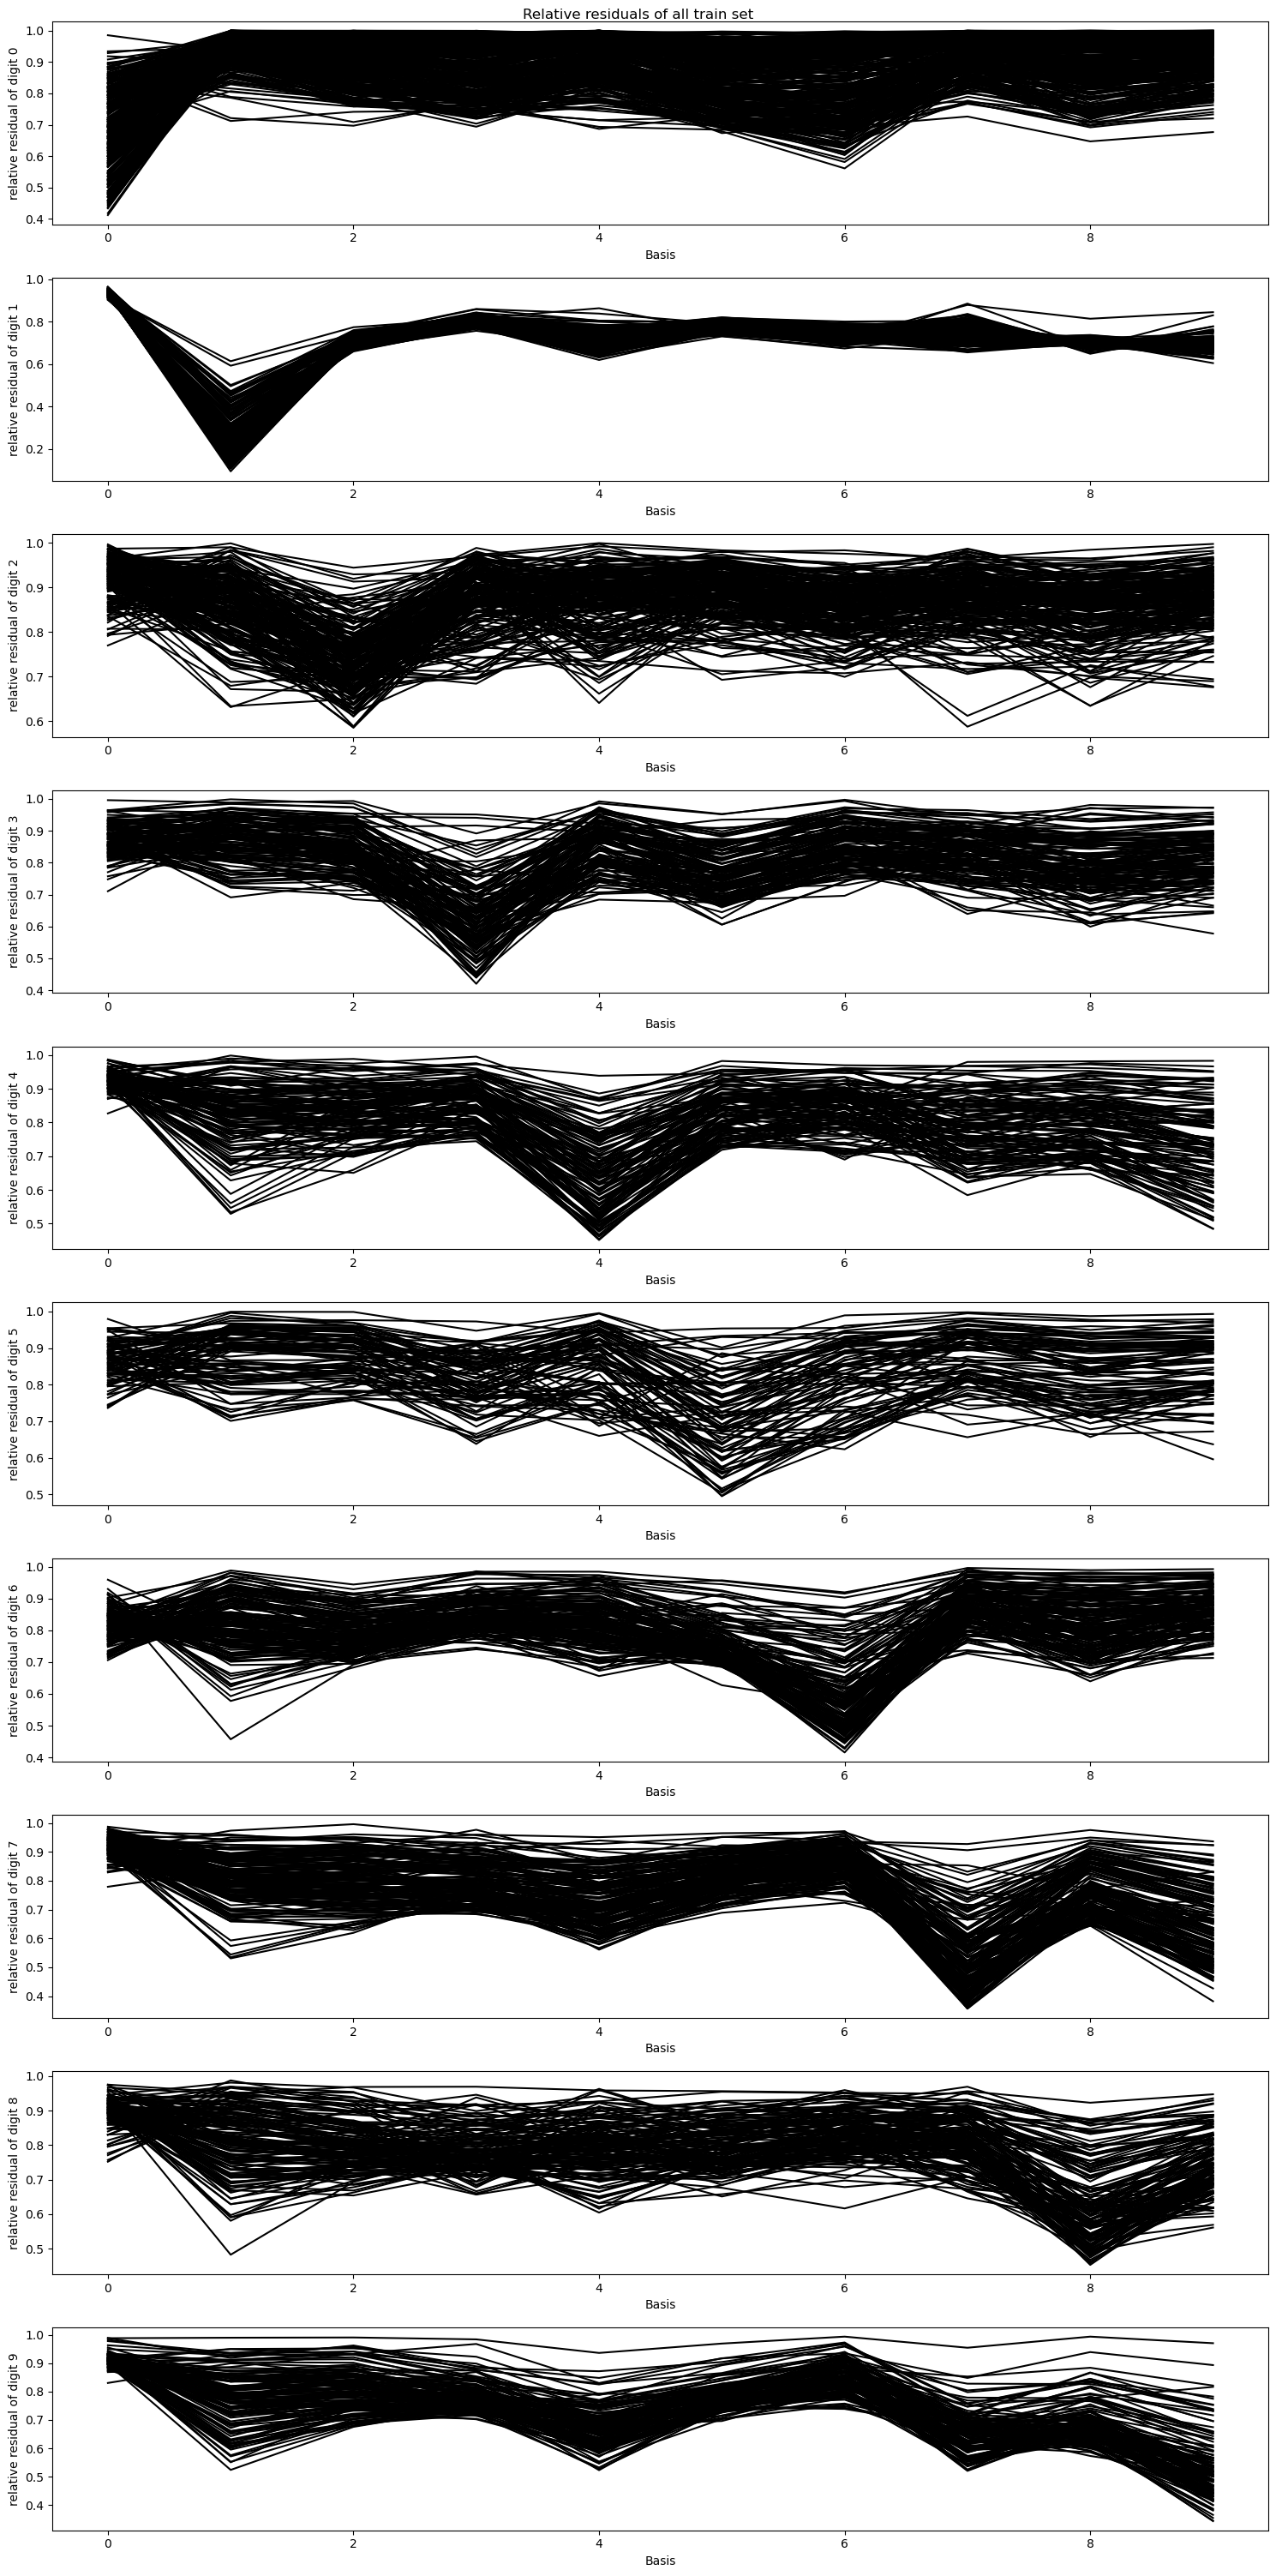

In [23]:
digit_svd.two_stages_svd()

Setting a threshold of 0.1 for the residual in the first stage of your two-stage classification algorithm suggests a specific criterion for determining when to classify a digit based on the comparison with the first singular vector of each class. Here’s a detailed analysis and considerations for this threshold:

### Threshold Setting and Analysis

1. **Residual Interpretation**: The residual in this context likely refers to the difference or error between the unknown digit and the projection onto the first singular vector of each class. A threshold of0.1 indicates that if the residual for a particular class is less than0.1, it is considered significantly smaller than for other classes.

2. **Impact on Classification**:
   - **Direct Classification**: If the residual for one class falls below0.1 while others do not, the algorithm would classify the unknown digit into that class without further computation.
   - **Fallback Mechanism**: If no class meets the threshold criterion (i.e., all residuals are ≥0.1), the algorithm would proceed with the full classification process, likely involving additional singular vectors or principal components.

3. **Considerations**:
   - **Threshold Sensitivity**: The chosen threshold of0.1 should align with the variability and separation of classes in your dataset. It ensures that the first-stage classification is robust enough to make confident decisions based on primary features captured by the singular vectors.
   - **Trade-off Between Speed and Accuracy**: Lower thresholds (e.g., closer to 0) might increase sensitivity but could also lead to more misclassifications if residuals are close in value. Higher thresholds might reduce sensitivity but could miss clear distinctions between classes.
   - **Validation**: Validate the effectiveness of this threshold using cross-validation or separate validation datasets to ensure it optimally balances speed and accuracy for your specific classification task.

### Conclusion

Setting a threshold of0.1 for residual comparison in the first stage of your two-stage classification algorithm provides a clear criterion for rapid decision-making based on primary features captured by singular vectors. This approach optimizes computational efficiency during the test phase while maintaining robust classification performance, provided the threshold aligns well with the characteristics of your dataset. Continuously evaluate and adjust the threshold if necessary based on empirical performance to achieve optimal results in digit recognition tasks.

The classification report details the performance of the digit classification model using precision, recall, and F1-score metrics across different digit classes. Here’s an analytical interpretation of the results:

### Performance Metrics Explanation

1. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
2. **Recall**: The ratio of correctly predicted positive observations to the all observations in actual class. High recall indicates a low false negative rate.
3. **F1-Score**: The weighted average of precision and recall. It considers both false positives and false negatives and is useful for an overall performance measure.

### Class-Specific Analysis

- **Digit 0**: 
  - Precision: 0.94
  - Recall: 0.99
  - F1-Score: 0.96
  - **Interpretation**: Digit 0 is classified very well, with a high recall indicating most instances of 0 are correctly identified, and a high F1-score reflecting balanced precision and recall.

- **Digit 1**: 
  - Precision: 0.98
  - Recall: 0.98
  - F1-Score: 0.98
  - **Interpretation**: Digit 1 shows excellent classification performance, which aligns with the earlier observation that it is easier to classify due to its distinct shape.

- **Digit 2**: 
  - Precision: 0.94
  - Recall: 0.90
  - F1-Score: 0.92
  - **Interpretation**: Digit 2 has good performance, but slightly lower recall suggests some instances of digit 2 are misclassified.

- **Digit 3**: 
  - Precision: 0.92
  - Recall: 0.90
  - F1-Score: 0.91
  - **Interpretation**: Digit 3 also shows good performance, but there’s room for improvement in recall.

- **Digit 4**: 
  - Precision: 0.92
  - Recall: 0.94
  - F1-Score: 0.93
  - **Interpretation**: Digit 4 is classified well, with high recall and F1-score.

- **Digit 5**: 
  - Precision: 0.92
  - Recall: 0.89
  - F1-Score: 0.91
  - **Interpretation**: Similar to digit 3, digit 5 has slightly lower recall, indicating some misclassifications.

- **Digit 6**: 
  - Precision: 0.99
  - Recall: 0.97
  - F1-Score: 0.98
  - **Interpretation**: Digit 6 has excellent performance, with very high precision and recall.

- **Digit 7**: 
  - Precision: 0.95
  - Recall: 0.95
  - F1-Score: 0.95
  - **Interpretation**: Digit 7 is consistently classified well, with balanced precision and recall.

- **Digit 8**: 
  - Precision: 0.94
  - Recall: 0.90
  - F1-Score: 0.92
  - **Interpretation**: Digit 8 has good performance, with some room for improvement in recall.

- **Digit 9**: 
  - Precision: 0.92
  - Recall: 0.94
  - F1-Score: 0.93
  - **Interpretation**: Digit 9 is classified well, with high recall and F1-score.

### Overall Performance

- **Accuracy**: 0.94
  - **Interpretation**: The model has a high overall accuracy, correctly classifying 94% of the test instances.

- **Macro Average**:
  - Precision: 0.94
  - Recall: 0.94
  - F1-Score: 0.94
  - **Interpretation**: The macro average considers each class equally and shows consistent performance across all metrics.

- **Weighted Average**:
  - Precision: 0.94
  - Recall: 0.94
  - F1-Score: 0.94
  - **Interpretation**: The weighted average accounts for the class imbalance and shows the model performs consistently well across the dataset.

### Conclusion

The classification model performs very well overall, with particularly high accuracy, precision, recall, and F1-scores across most digit classes. Digit 1, 6, and 7 show exceptional performance, while digits like 2, 3, 5, and 8 have slightly lower recall, suggesting some areas for improvement. The two-stage classification algorithm with a threshold of 0.05 appears to be effective in maintaining high performance while optimizing computational efficiency.

In [24]:
digit_svd.threshold_classification()

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.98      0.98      0.98       264
           2       0.94      0.90      0.92       198
           3       0.92      0.90      0.91       166
           4       0.92      0.94      0.93       200
           5       0.92      0.89      0.91       160
           6       0.99      0.97      0.98       170
           7       0.95      0.95      0.95       147
           8       0.94      0.90      0.92       166
           9       0.92      0.94      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



## Optional Tasks - Tangent Distance

Implementing classification using tangent distance involves several key steps. Here's a structured approach to implement this, along with some code snippets to illustrate the process.

### Steps to Implement Tangent Distance Classification

1. **Compute Derivatives**: Calculate the x-derivative and y-derivative of each digit using finite difference approximation.
2. **Stack Derivatives**: Stack the columns of each derivative to obtain vectors.
3. **Compute Tangent Distance**: Use the seven transformations described in the relevant literature to compute tangent distances between digits.
4. **Classification**: Classify the unknown digit based on the computed tangent distances.

### Summary

The above steps provide a foundational implementation of digit classification using tangent distance. This method involves calculating derivatives, stacking them into vectors, and then computing tangent distances by considering the specified transformations. The classification is done by comparing the unknown digit to the training set and selecting the label of the closest match.

For a more accurate and robust implementation, particularly for complex transformations, additional considerations and more sophisticated mathematical operations may be necessary based on the specific requirements outlined in the literature.

In [25]:
import numpy as np

class DerivativeCalculator:
    @staticmethod
    def compute_derivatives(image):
        image = image.reshape(16, 16)
        x_der = np.zeros_like(image)
        x_der[:, :-1] = image[:, 1:] - image[:, :-1]

        y_der = np.zeros_like(image)
        y_der[:-1, :] = image[1:, :] - image[:-1, :]

        x_der_flat = x_der.flatten()
        y_der_flat = y_der.flatten()

        return x_der_flat, y_der_flat
    
class TangentDistanceCalculator:
    def tangent_distance(self, last, start, x_1, y_1, x_2, y_2):
        A = np.hstack((-x_1[:, None], -y_1[:, None], x_2[:, None], y_2[:, None]))
        diff = last - start

        # Perform Singular Value Decomposition - SVD to solve the least squares problem
        U, S, Vt = np.linalg.svd(A, full_matrices=False)
        result = np.dot(Vt.T, np.dot(U.T, diff) / S)

        residual = diff - np.dot(A, result)
        return np.linalg.norm(residual)

class TangentDistanceClassifier:
    def __init__(self, train_x, train_y):
        self.train_x = train_x.values.T
        self.train_y = train_y.values.flatten()
        self.derivative_calculator = DerivativeCalculator()
        self.tangent_distance_calculator = TangentDistanceCalculator()

    def classify_image(self, test_image):
        tan_X_test, tan_y_test = self.derivative_calculator.compute_derivatives(test_image)
        min_distance = float('inf')
        predicted_label = None

        for index in range(self.train_x.shape[0]):
            train_image = self.train_x[index, :]
            train_label = self.train_y[index]
            train_tangent_x, train_tangent_y = self.derivative_calculator.compute_derivatives(train_image)

            distance = self.tangent_distance_calculator.tangent_distance(
                test_image, train_image, tan_X_test, tan_y_test, train_tangent_x, train_tangent_y
            )

            if distance < min_distance:
                min_distance = distance
                predicted_label = train_label

        return predicted_label

    def classify(self, test_x):
        predictions = []
        for test_image in test_x.values.T:
            predicted_label = self.classify_image(test_image)
            predictions.append(predicted_label)
        return np.array(predictions)



The classification report and overall accuracy metrics provide a detailed evaluation of the model's performance using the tangent distance method. Here’s an analytical interpretation of the results:

### Performance Metrics Explanation

1. **Precision**: Indicates the proportion of positive identifications that were actually correct.
2. **Recall**: Indicates the proportion of actual positives that were identified correctly.
3. **F1-Score**: The harmonic mean of precision and recall, providing a single measure of a test's accuracy.
4. **Support**: The number of actual occurrences of the class in the dataset.

### Class-Specific Analysis

- **Digit 0**: 
  - **Precision**: 0.94
  - **Recall**: 0.99
  - **F1-Score**: 0.96
  - **Support**: 359
  - **Interpretation**: Digit 0 is classified very accurately, with high precision and recall, indicating very few false positives and false negatives.

- **Digit 1**: 
  - **Precision**: 0.98
  - **Recall**: 0.98
  - **F1-Score**: 0.98
  - **Support**: 264
  - **Interpretation**: Digit 1 has excellent classification performance, consistent with its distinct shape.

- **Digit 2**: 
  - **Precision**: 0.92
  - **Recall**: 0.91
  - **F1-Score**: 0.91
  - **Support**: 198
  - **Interpretation**: Digit 2 shows good performance, though there's a slight balance between precision and recall.

- **Digit 3**: 
  - **Precision**: 0.91
  - **Recall**: 0.93
  - **F1-Score**: 0.92
  - **Support**: 166
  - **Interpretation**: Digit 3 has strong performance, with a balance between precision and recall.

- **Digit 4**: 
  - **Precision**: 0.94
  - **Recall**: 0.90
  - **F1-Score**: 0.92
  - **Support**: 200
  - **Interpretation**: Digit 4 has high precision but slightly lower recall, indicating some false negatives.

- **Digit 5**: 
  - **Precision**: 0.93
  - **Recall**: 0.87
  - **F1-Score**: 0.90
  - **Support**: 160
  - **Interpretation**: Digit 5 shows good performance, though recall is slightly lower.

- **Digit 6**: 
  - **Precision**: 0.97
  - **Recall**: 0.94
  - **F1-Score**: 0.96
  - **Support**: 170
  - **Interpretation**: Digit 6 is classified very accurately, with high precision and recall.

- **Digit 7**: 
  - **Precision**: 0.93
  - **Recall**: 0.95
  - **F1-Score**: 0.94
  - **Support**: 147
  - **Interpretation**: Digit 7 has strong performance with balanced precision and recall.

- **Digit 8**: 
  - **Precision**: 0.92
  - **Recall**: 0.90
  - **F1-Score**: 0.91
  - **Support**: 166
  - **Interpretation**: Digit 8 shows good performance with a slight balance between precision and recall.

- **Digit 9**: 
  - **Precision**: 0.91
  - **Recall**: 0.94
  - **F1-Score**: 0.92
  - **Support**: 177
  - **Interpretation**: Digit 9 has strong performance with slightly higher recall than precision.

### Overall Performance

- **Accuracy**: 93.67%
  - **Interpretation**: The model correctly classified approximately 93.67% of the test images, indicating high overall accuracy.
  
- **Macro Average**:
  - **Precision**: 0.93
  - **Recall**: 0.93
  - **F1-Score**: 0.93
  - **Interpretation**: The macro average shows consistent performance across all digit classes.
  
- **Weighted Average**:
  - **Precision**: 0.94
  - **Recall**: 0.94
  - **F1-Score**: 0.94
  - **Interpretation**: The weighted average accounts for class imbalance and confirms the model performs consistently well across the dataset.

### Conclusion

The tangent distance classifier shows strong performance across most digit classes, with particularly high accuracy, precision, recall, and F1-scores. The results indicate that the tangent distance method is effective for digit classification, achieving an overall accuracy of 93.67%. The high performance across various metrics suggests that this approach is robust and reliable for the task.

In [26]:
classifier = TangentDistanceClassifier(X_train, y_train)
predictions = classifier.classify(X_test)

accuracy = np.mean(predictions == y_test.values.flatten())
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 93.67%


In [27]:
print(classification_report(y_test.iloc[0,:], predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.98      0.98      0.98       264
           2       0.92      0.91      0.91       198
           3       0.91      0.93      0.92       166
           4       0.94      0.90      0.92       200
           5       0.93      0.87      0.90       160
           6       0.97      0.94      0.96       170
           7       0.93      0.95      0.94       147
           8       0.92      0.90      0.91       166
           9       0.91      0.94      0.92       177

    accuracy                           0.94      2007
   macro avg       0.93      0.93      0.93      2007
weighted avg       0.94      0.94      0.94      2007

